In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv(r"/kaggle/input/house-price-prediction-dataset/House Price Prediction Dataset.csv")

In [4]:
df.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Location,Condition,Garage,Price
0,1,1360,5,4,3,1970,Downtown,Excellent,No,149919
1,2,4272,5,4,3,1958,Downtown,Excellent,No,424998
2,3,3592,2,2,3,1938,Downtown,Good,No,266746
3,4,966,4,2,2,1902,Suburban,Fair,Yes,244020
4,5,4926,1,4,2,1975,Downtown,Fair,Yes,636056


**Clean Missing Values (If Any)**

In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Id         2000 non-null   int64 
 1   Area       2000 non-null   int64 
 2   Bedrooms   2000 non-null   int64 
 3   Bathrooms  2000 non-null   int64 
 4   Floors     2000 non-null   int64 
 5   YearBuilt  2000 non-null   int64 
 6   Location   2000 non-null   object
 7   Condition  2000 non-null   object
 8   Garage     2000 non-null   object
 9   Price      2000 non-null   int64 
dtypes: int64(7), object(3)
memory usage: 156.4+ KB


In [6]:
df.describe()

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Price
count,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1000.500000,2786.209500,3.003500,2.55250,1.993500,1961.446000,537676.855000
std,577.494589,1295.146799,1.424606,1.10899,0.809188,35.926695,276428.845719
min,1.000000,501.000000,1.000000,1.00000,1.000000,1900.000000,50005.000000
25%,500.750000,1653.000000,2.000000,2.00000,1.000000,1930.000000,300098.000000
50%,1000.500000,2833.000000,3.000000,3.00000,2.000000,1961.000000,539254.000000
75%,1500.250000,3887.500000,4.000000,4.00000,3.000000,1993.000000,780086.000000
max,2000.000000,4999.000000,5.000000,4.00000,3.000000,2023.000000,999656.000000


# Data Visualization


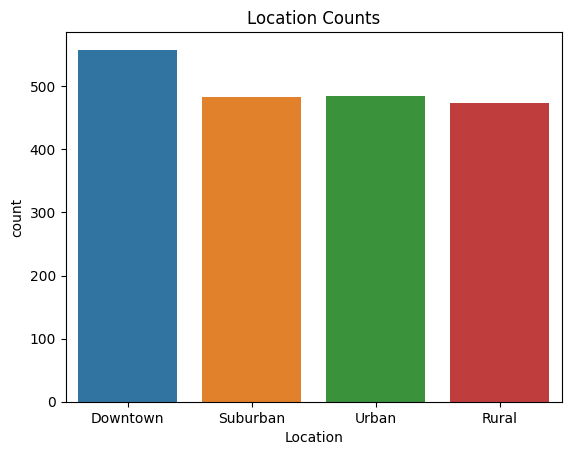

In [7]:
sns.countplot(x = "Location",data = df)
plt.title("Location Counts")
plt.show()

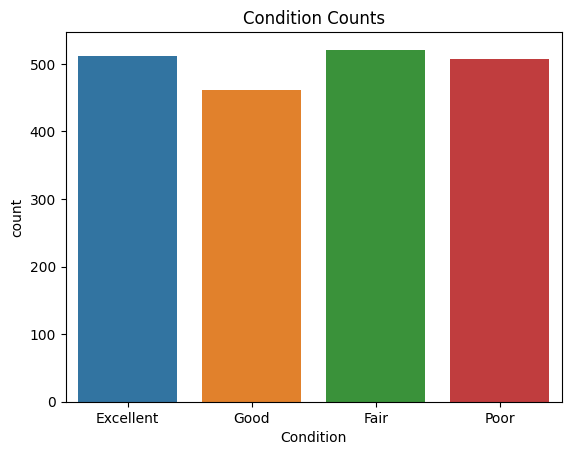

In [8]:
sns.countplot(x = "Condition",data = df)
plt.title("Condition Counts")
plt.show()

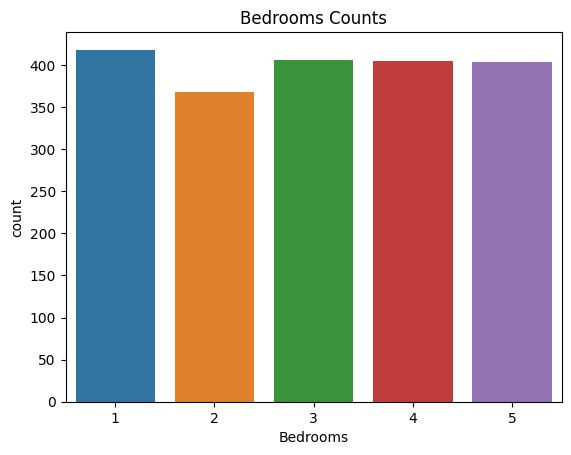

In [9]:
sns.countplot(x = "Bedrooms",data = df)
plt.title("Bedrooms Counts")
plt.show()

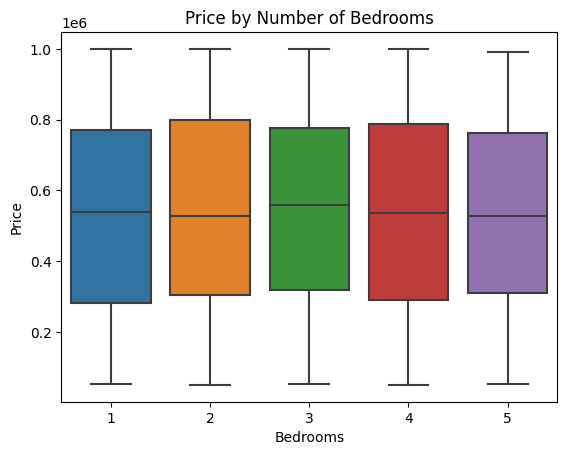

In [10]:
sns.boxplot(x='Bedrooms', y='Price', data=df)
plt.title("Price by Number of Bedrooms")
plt.show()

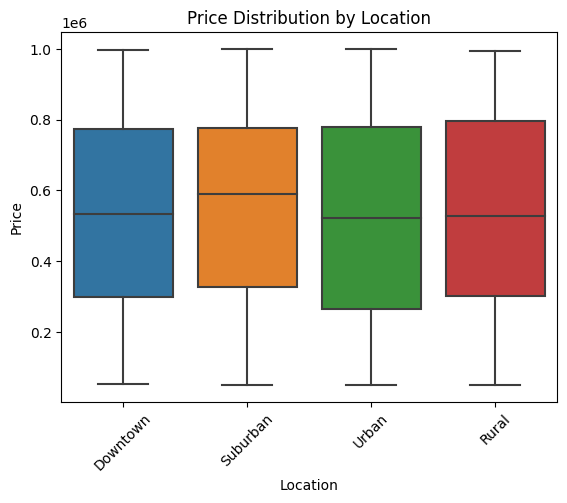

In [11]:
sns.boxplot(x='Location', y='Price', data=df)
plt.xticks(rotation=45)
plt.title("Price Distribution by Location")
plt.show()


# Converting Categorical Data to Numerical Data


In [12]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [13]:
le_condition=LabelEncoder()
df['Condition']=le_condition.fit_transform(df["Condition"])


In [14]:
le_garage=LabelEncoder()
df['Garage']=le_garage.fit_transform(df['Garage'])

*One Hot Encoding on Location Because this is not Ordinal Data*

In [15]:
df=pd.get_dummies(df,columns=['Location'])

In [16]:
df[['Location_Downtown', 'Location_Rural', 'Location_Suburban','Location_Urban']] = \
    df[['Location_Downtown', 'Location_Rural', 'Location_Suburban','Location_Urban']].astype(int)


In [17]:
df.head(5)

,Id,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban
0,1,1360,5,4,3,1970,0,0,149919,1,0,0,0
1,2,4272,5,4,3,1958,0,0,424998,1,0,0,0
2,3,3592,2,2,3,1938,2,0,266746,1,0,0,0
3,4,966,4,2,2,1902,1,1,244020,0,0,1,0
4,5,4926,1,4,2,1975,1,1,636056,1,0,0,0


In [18]:
df.drop(columns=["Id"],inplace = True,)

In [19]:
x = df.drop(columns=['Price'])
y = df["Price"]


>From: sklearn.preprocessing import StandartScaler

>Purpose:
👉 Scale numerical features so that they have:

>Mean = 0

>Standard deviation = 1

>This helps ML models that are sensitive to feature scales — like Linear Regression, SVM, KNN, Neural Networks. 

In [20]:
 scaler = StandardScaler()
x = scaler.fit_transform(df)

In [21]:
x = pd.DataFrame(x, columns=df.columns)


In [22]:
x.head(5)

,Area,Bedrooms,Bathrooms,Floors,YearBuilt,Condition,Garage,Price,Location_Downtown,Location_Rural,Location_Suburban,Location_Urban
0,-1.101471,1.401791,1.305568,1.244151,0.238155,-1.316267,-0.962695,-1.403091,1.607554,-0.557329,-0.564262,-0.565802
1,1.147485,1.401791,1.305568,1.244151,-0.095942,-1.316267,-0.962695,-0.407725,1.607554,-0.557329,-0.564262,-0.565802
2,0.622317,-0.704581,-0.498326,1.244151,-0.652770,0.460072,-0.962695,-0.980356,1.607554,-0.557329,-0.564262,-0.565802
3,-1.405759,0.699667,-0.498326,0.008035,-1.655061,-0.428098,1.038750,-1.062589,-0.622063,-0.557329,1.772226,-0.565802
4,1.652574,-1.406705,1.305568,0.008035,0.377363,-0.428098,1.038750,0.355982,1.607554,-0.557329,-0.564262,-0.565802


# Model Training


In [23]:
from sklearn.model_selection import train_test_split


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [26]:
 
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)
model.fit(x_train, y_train)

GradientBoostingRegressor()

In [27]:
 
y_pred = model.predict(x_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", mean_squared_error(y_test, y_pred, squared=False))

R2 Score: 0.9999470597951277
RMSE: 2007.6418617699069


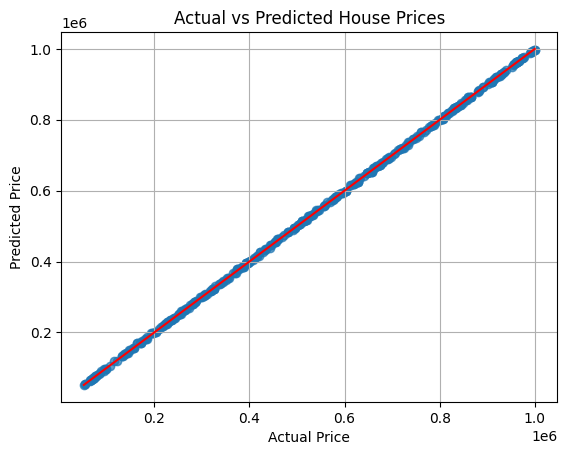

In [28]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.grid(True)
plt.show()


# Predictions

In [29]:
def predict_house_price(model, scaler, X_train_columns, input_dict):
  
    input_df = pd.DataFrame([input_dict])

    input_encoded = pd.get_dummies(input_df)

    input_aligned = input_encoded.reindex(columns=X_train_columns, fill_value=0)
 
    input_scaled = scaler.transform(input_aligned)
 
    input_scaled_df = pd.DataFrame(input_scaled, columns=X_train_columns)
 
    prediction = model.predict(input_scaled_df)

    return round(prediction[0], 2)


In [30]:
 
new_house = {
    "Area": 3000,
    "Bedrooms": 4,
    "Bathrooms": 2,
    "Floors": 2,
    "YearBuilt": 2010,
    "Location": "Downtown",
    "Condition": "Good",
    "Garage": "No"
}

 
price = predict_house_price(model, scaler, x_train.columns, new_house)

print("Predicted Price:", price)


Predicted Price: 51076.13
